In [6]:
import sys
sys.path.insert(0, r'../../../quetzal')

from quetzal.io import  gtfs_importer
from quetzal.model import stepmodel

import geopandas as gpd

% matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [16, 9]

In [7]:
training_folder = '../../'
input_folder = training_folder + r'inputs/'
gtfs_folder = input_folder + r'/input_gtfs/'

In [8]:
importer = gtfs_importer.BaseGtfsImporter(gtfs_folder)
importer.read()

In [9]:
importer.stop_times.head(1)

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,stop_headsign,shape_dist_traveled
0,10003887950313949,00:20:00,00:20:00,2090,1,NaN,NaN


In [10]:
importer.cast_columns_to_string(columns=['trip_id', 'route_id', 'stop_id'])

stop_times ['trip_id', 'stop_id'] converted to string
trips ['route_id', 'trip_id'] converted to string
routes ['route_id'] converted to string
stops ['stop_id'] converted to string


# add colors

In [11]:
rainbow_shades = ["#D22328", "#559BB4", "#91A564", "#DC9100", "#8C4B7D", "#A08C69",
    "#647D6E", "#5A7382", "#64411E", "#A00037", "#643C5A"]
diverging_colors = ['#a6cee3', '#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c',
    '#fdbf6f','#ff7f00','#cab2d6','#6a3d9a','#ffff99','#b15928']

importer.routes['route_color'] = list(diverging_colors * 10000)[:len(importer.routes)]

# build links and nodes

In [12]:
importer.build()

In [27]:
importer.links.head(1)

,index,a,trip_id,link_sequence,departure_time,b,arrival_time,time,route_id,direction_id,...,shape_id,agency_id,route_short_name,route_long_name,route_desc,route_type,route_url,route_color,route_text_color,geometry
0,0,2090,10003887950313949,1,1200.0,2091,1500.0,300.0,323511,0,...,NaN,100,FUNICULAIRE,FUN (FUNICULAIRE) - Aller,NaN,3,NaN,#D22328,0,LINESTRING (2.342610282962049 48.8846961785521...


# rename route types

In [13]:
importer.links['route_type'] = importer.links['route_type'].apply(
    lambda t: {
        0:'tram',
        1:'subway',
        2:'rail',
        3:'bus',
        4:'ferry',
        5:'cable_car',
        6:'gondola',
        7:'funicular'
    }[t]
)

# export 

In [14]:
sm = stepmodel.StepModel()
sm.links = importer.links
sm.nodes = importer.stops[['geometry', 'stop_id']]

Model epsg not defined: setting epsg to default one: 4326
Model coordinates_unit not defined: setting coordinates_unit to default one: degree


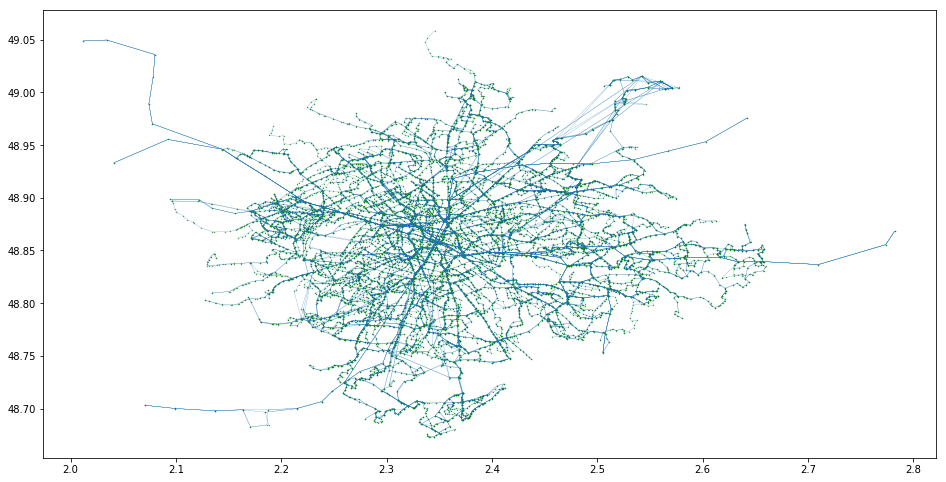

In [15]:
plot = gpd.GeoDataFrame(sm.links).plot(linewidth=0.2)
gpd.GeoDataFrame(sm.nodes).plot(ax=plot, color='green', markersize=0.1)

In [16]:
sm.to_json(input_folder + 'gtfs', only_attributes=['links', 'nodes'])

to_hdf(overwriting): 100%|█████████████████████████████████████████████████████████████| 26/26 [00:22<00:00,  1.15it/s]
